<a href="https://colab.research.google.com/github/hruwang/Myrepository1/blob/master/Dating_Science_Hongru_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sad Ethan on Last Valentine's Day

![替代文字](https://pbs.twimg.com/media/D0CxRUYUYAAniAm?format=jpg&name=900x900)

## Step No.1  in Love Hunting: Loading Packages

In [0]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
dating = pd.read_csv('drive/My Drive/Colab Notebooks/Speed Dating Data.csv',encoding="ISO-8859-1") # use this encoding, funky error otherwise. thanks kagglers!
dating.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [0]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']

In [0]:
df = dating[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 8356
Data columns (total 48 columns):
iid         551 non-null int64
wave        551 non-null int64
gender      551 non-null int64
age         543 non-null float64
field       545 non-null object
field_cd    544 non-null float64
undergra    315 non-null object
mn_sat      202 non-null object
tuition     234 non-null object
race        545 non-null float64
imprace     544 non-null float64
imprelig    544 non-null float64
from        544 non-null object
zipcode     475 non-null object
income      281 non-null object
goal        544 non-null float64
date        543 non-null float64
go_out      544 non-null float64
career      543 non-null object
career_c    539 non-null float64
sports      544 non-null float64
tvsports    544 non-null float64
exercise    544 non-null float64
dining      544 non-null float64
museums     544 non-null float64
art         544 non-null float64
hiking      544 non-null float64
gaming      544 n

In [0]:
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)
dating['gender'] = dating.gender.map({1 : 'Male', 0 : 'Female'}).fillna(dating.gender)
df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

##She Walks in Beauty, Like the Night

<Figure size 1152x720 with 0 Axes>

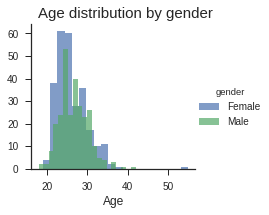

In [0]:
g = sns.FacetGrid(df, hue='gender')
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()

*
So most of the participants were in their mid twenties to early thirties.

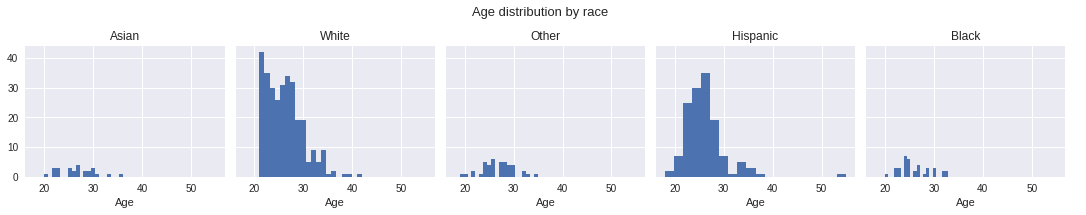

In [0]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


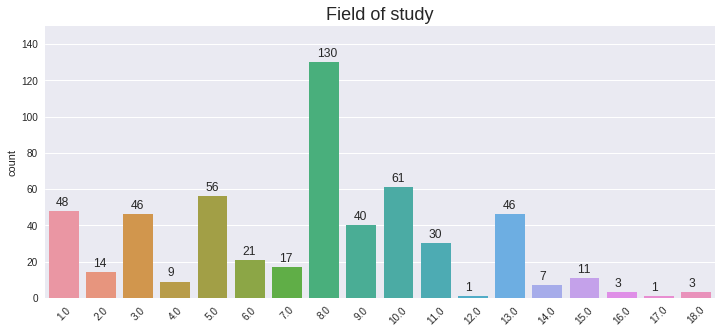

In [0]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=df)
plt.title('Field of study', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 150)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

*
1= Lawyer 
2= Academic/Research 
3= Psychologist 
4= Doctor/Medicine 
5=Engineer 
6= Creative Arts/Entertainment 
7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8= Real Estate 
9= International/Humanitarian Affairs 
10= Undecided 
11=Social Work
12=Speech Pathology
13=Politics
14=Pro sports/Athletics
15=Other
16=Journalism
17=Architecture


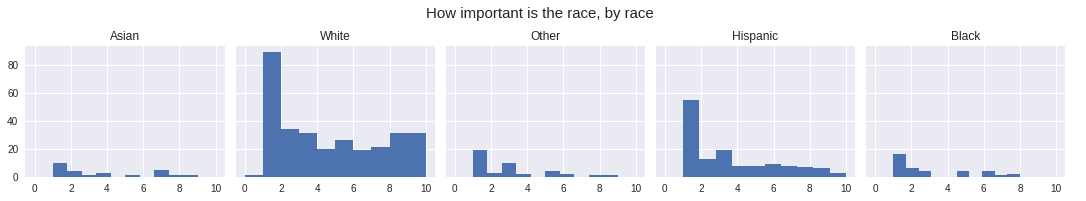

In [0]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

In [0]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

Text(0.5, 1.0, 'Females')

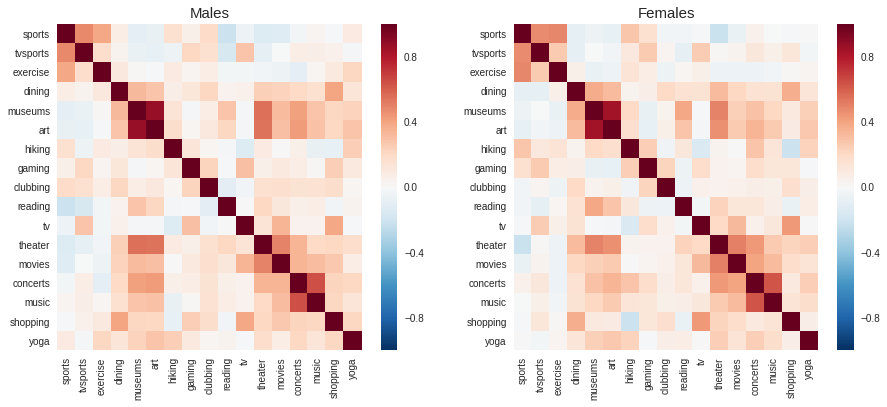

In [0]:
corr_m = df[df.gender=='Male'][interests].corr()
corr_f = df[df.gender=='Female'][interests].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='RdBu_r', ax=ax[0])
sns.heatmap(corr_f, cmap='RdBu_r', ax=ax[1])

ax[0].set_title('Males', fontsize=15)
ax[1].set_title('Females', fontsize=15)

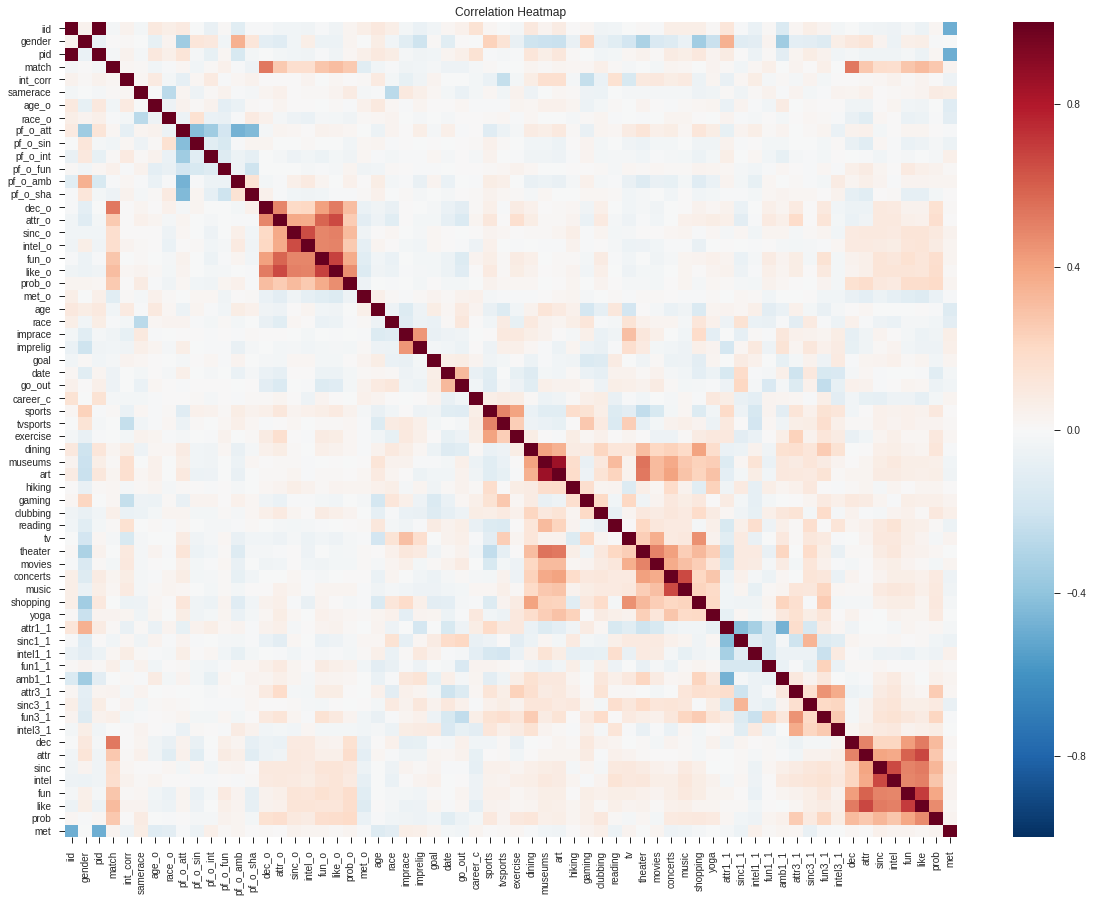

In [0]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

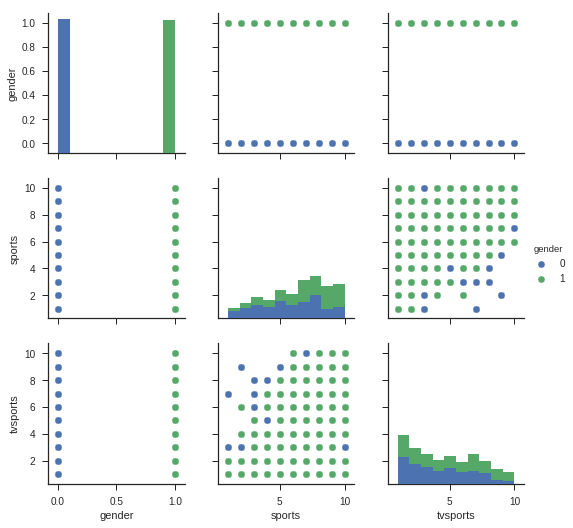

In [0]:
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

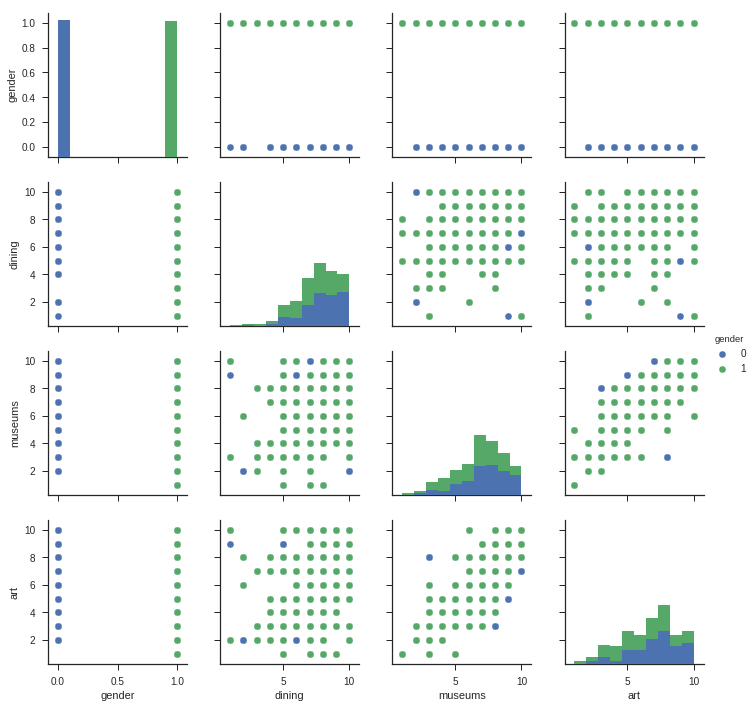

In [0]:
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

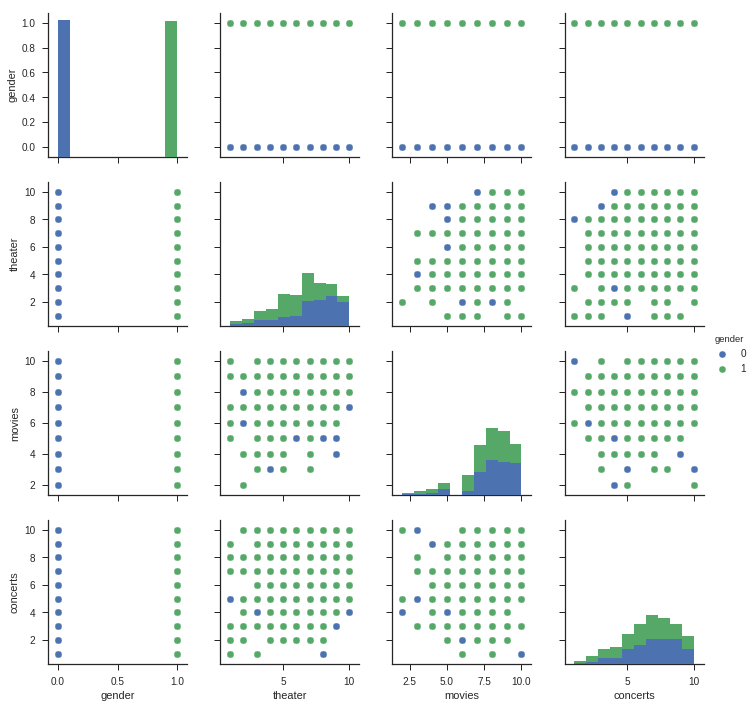

In [0]:
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender")

![替代文字](https://pbs.twimg.com/media/D0CsYRPVsAApBp2?format=jpg&name=large)

## Dear Cupid: Next time, HIT US BOTH.

In [0]:
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [0]:
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 0, 'Broken Heart')

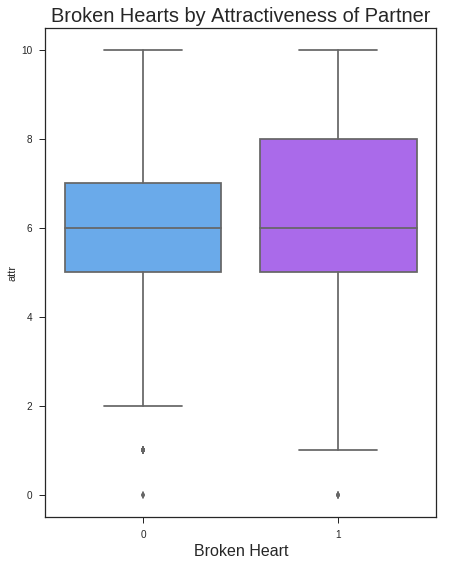

In [0]:
# encoding unrequited love as a new column
date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date4, palette='cool')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

##OLS Model: **O**pen but **L**ost **S**ingleman Analysis





In [0]:
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [0]:
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [0]:
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [0]:
# OLS model with coefficients
X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1712.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:46:32   Log-Likelihood:                -3686.4
No. Observations:                6797   AIC:                             7385.
Df Residuals:                    6791   BIC:                             7426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0555      0.004     15.678      0.000       0.049       0.062
sinc          -0.0351      0.004     -8.750      0.000      -0.043      -0.027
intel         -0.0485      0.004    -11.897      0.000      -0.057      -0.041
fun            0.0173      0.004      4.495      0.000       0.010       0.025
like           0.0997      0.004     22.261      0.000       0.091       0.109
int_corr      -0.0366      0.017     -2.210      0.027      -0.069      -0.004
==============================================================================
Omnibus:                     4603.362   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.555
Skew:                           0.072   Prob(JB):                     2.11e-86
Kurtosis:                       1.828   Cond. No.                         50.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#both respondents' ratings on match instead of decision
X_ols = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_ols = date4.match
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1381.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:52:06   Log-Likelihood:                -180.33
No. Observations:                6797   AIC:                             378.7
Df Residuals:                    6788   BIC:                             440.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dec            0.4463      0.007     62.145      0.000       0.432       0.460
dec_o          0.4463      0.007     62.417      0.000       0.432       0.460
attr          -0.0013      0.002     -0.584      0.559      -0.005       0.003
attr_o        -0.0009      0.002     -0.406      0.685      -0.005       0.003
fun            0.0006      0.002      0.249      0.803      -0.004       0.005
fun_o          0.0012      0.002      0.555      0.579      -0.003       0.006
like          -0.0161      0.003     -6.132      0.000      -0.021      -0.011
like_o        -0.0170      0.003     -6.523      0.000      -0.022      -0.012
int_corr       0.0036      0.010      0.364      0.716      -0.016       0.023
==============================================================================
Omnibus:                       72.137   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.640
Skew:                           0.256   Prob(JB):                    1.27e-177
Kurtosis:                       1.383   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Classfication: Can Match be Predicted?

In [0]:
X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [0]:
# logistic
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Accuracy on Training Dataset:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Accuracy from Cross Validation:', metrics.accuracy_score(y_test, predict_test_lrc))

Accuracy on Training Dataset: 0.8252712893139599
Accuracy from Cross Validation: 0.825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# random forest
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Accuracy on Training Dataset:', metrics.accuracy_score(y_train, predict_train_rf))
print('Accuracy from Cross Validation:', metrics.accuracy_score(y_test, predict_test_rf))

Accuracy on Training Dataset: 0.8289497884862976
Accuracy from Cross Validation: 0.8279411764705882


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# xgboost
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Accuracy on Training Dataset:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Accuracy from Cross Validation:', metrics.accuracy_score(y_test, predict_test_xgb))

Accuracy on Training Dataset: 0.8289497884862976
Accuracy from Cross Validation: 0.8272058823529411


## Conclusion
* We observed a relationship between gender, race, and how important are race and religion, with the gender having a much higher weight.
* Invite someone out to a dinner or a movie because both genders are likely to enjoy it.
* Dating is slightly tougher for male, but good news is that if you are stroke out, it's not you that is the problem.
* Based on the results of classfication model, there seems to be a threshold for further accuracy improvement. In other word, Machine Learning has helped you to this level, and the rest depends on yourself.